<a href="https://colab.research.google.com/github/mloyorev/Theory/blob/main/SolowFixedPoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We use the following **imports**:


*   **Numpy:** Python library used to perform efficient numeric operations on matrices and multidimensional arrays.
*   **Matplotlib.pyplot:** Python's Matplotlib library and is used to create graphs and data visualizations.
*   **Namedtuple:** Import the namedtuple class from the collections module. Namedtuple is a factory function that allows you to create tuples with predefined field names.






In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

# **Capital stock dynamics**

Assuming a Cobb-Douglas production technology $y_t=Ak_t^α$ and an utility function $u(c_t)$, **the problem of a dynamic economy with production, capital stock and consumption** consist in

$$\max_{\left\{ c_t, k_{t+1} \right\}}∑_{t=0}^∞β^{t}u(c_t) \hspace 0.2cm s.a. \hspace 0.2cm Ak_t^α=c_t+k_{t+1}-(1-\delta)k_t$$


We store the parameters of the model in a **namedtuple**, which will help us to create a tuple with predefined field names for each of the model parameters.


In [24]:
SolowParameters = namedtuple("SolowParameters", ('A','alpha', 'beta','delta')) # A is the TFP
                                                                               # alpha is the elasticity of the production wrt the capital stock
                                                                               # beta is the discount factor
                                                                               # delta is the depreciation rate

Then we define a function that assign default values for the parameters defined in the 'namedtuple' above.

In [25]:
# Set default values for the parameters of the model
def create_solow_params(A = 2, alpha = 0.3, beta = 0.5, delta = 0.6):
  return SolowParameters(A = A, alpha = alpha, beta = beta, delta = delta)

In [26]:
print(create_solow_params())

SolowParameters(A=2, alpha=0.3, beta=0.5, delta=0.6)


The important thing about 'namedtuple' is that **you can change the values ​​of the default parameters** just by calling them again. For example...


In [27]:
eg_parameters = create_solow_params(alpha = 0.7)
print(eg_parameters)

SolowParameters(A=2, alpha=0.7, beta=0.5, delta=0.6)


By solving analytically we can introduce **specific functions for the capital stock and savings rate in SS**$^{1}$.

$$s_{ss}=\frac{αβδ}{1-β(1-δ)}$$

$$k_{ss}=\left(\frac{s_{ss}A}{δ}\right)^{\frac{1}{1-α}}$$

In [29]:
# Create a function that returns the savings rate of SS
def s_savings(params):
  A, alpha, beta, delta = params
  return (alpha * beta * delta) / (1 - beta * (1 - delta))

# Create a function that returns the capital stock of SS
def s_capital(s, params):
  A, alpha, beta, delta = params
  return ((s * A) / delta) ** (1 / (1 - alpha))

For example, for the default parameters we have...

In [30]:
model = create_solow_params()
print('The default parameter values are:',model)

The default parameter values are: SolowParameters(A=2, alpha=0.3, beta=0.5, delta=0.6)


In [31]:
sss = s_savings(model)
print('The SS savings rate is:',sss)

The SS savings rate is: 0.11249999999999999


In [32]:
kss = s_capital(sss, model)
print('The SS capital stock is:',kss)

The SS capital stock is: 0.24630500651611642


Given this SS savings rate, we could define a function for the **law of motion for capital stock**

$$g(k_t)=k_{t+1}=s_{ss}Ak_t^α+(1-δ)k_t$$

In [33]:
# Create a function that returns the law of motion of capital
def g(s, k, params):
  A, alpha, beta, delta = params
  return s * A * k ** alpha + (1 - delta) * k

Under the assumption that $g(k_t)$ is a contraction mapping, we define a **succesive aproximation function** to obtain the steady state capital stock by means of iterations of the operator.

In [34]:
def successive_approx(f,                     # Operator
                      params,                # Parameters for the transformation
                      s,                     # Savings rate
                      k_0,                   # Initial condition
                      tolerance=1e-6,        # Error tolerance
                      ):
    k = k_0                               # Initilize capital stock and error
    error = tolerance + 1
    while error > tolerance:              # The algorithm keeps iterating while error > tolerance
        k_new = f(s, k, params)           # Apply the operator
        error = np.max(np.abs(k_new - k)) # Update the error with the supremum norm
        k     = k_new                     # Udate capital stock
    return k

We can test this function with the default parameters.

In [35]:
k_0 = 0.01
successive_approx(g , model, sss, k_0, tolerance = 0)

0.24630500651611642

We can verify that the successive approximation function is correct, since we arrive to the same SS as with the formula for steady state capital stock defined above.

In [36]:
kss = s_capital(sss, model)
print(kss)

0.24630500651611642


We can also define a function that shows the sequence of the first 30 values ​​that the capital stock takes before reaching the steady state.

In [37]:
def compute_iterates(k_0, s, f, params, n=30):
    k = k_0
    k_iterates = []             # We'll create an empty list to store the string values.
    for t in range(n):          # Exectute the function n times (from 0 to n-1).
        k = f(s, k, params)     # Update the current value of k by evaluating it in f, and so on.
        k_iterates.append(k)    # Add each value of a k to the list of k_itearates
    return k_iterates

In [38]:
k_series = compute_iterates(k_0, sss, g, model)
print(k_series)

[0.06051744470896554, 0.12120138499939068, 0.16794393255467427, 0.19892186675791157, 0.2181764208143017, 0.22977384876908857, 0.23664425033649406, 0.24067735083762679, 0.24303275899816829, 0.2444043433548337, 0.2452016938088581, 0.2456647729919209, 0.24593356607324682, 0.2460895357395495, 0.24618002158453162, 0.24623251125904222, 0.24626295792251918, 0.24628061787954492, 0.24629086095475677, 0.2462968020393453, 0.2463002479023714, 0.24630224651435226, 0.24630340571314474, 0.2463040780497374, 0.2463044680053961, 0.24630469417982442, 0.24630482536104212, 0.24630490144616493, 0.24630494557554172, 0.24630497117058214]


Now here we have a function to provide a 45 degree of the dynamics with dots indicating progress of the succesive aproximation function.

In [70]:
def plot_45(s, params, kiter, ax, fontsize=14):
    dev = 0.9
    k_min, k_max = 0, (1 + 0.9) * s_capital(s, params)  # k_min y k_max indicate the minimum and maximum values ​​for k.
    k_grid       = np.linspace(k_min, k_max, 1200)      # Gives a sequence of 1200 equidistant points in the established range.

    # Plot the functions
    lb = r"$g(k) = sAk^{\alpha} + (1 - \delta)k$"                                     # Define the label.
    ax.plot(k_grid, g(s, k_grid, params),  lw=2, alpha=0.6, label=lb, color = 'blue') # Plot g(x) on the graph by evaluating the values ​​of k_grid on it.
    ax.plot(k_grid, k_grid, "k--", lw=1, alpha=0.7, label="45")                       # Order to graph a 45 degree line
    ax.plot(kiter[:-1], kiter[1:], "ro", ms=10, alpha=0.6, color = 'green')           # Order to graph the first 30 iterations

    # Show and annotate the fixed point
    kstar = s_capital(s, params)
    fps = (kstar,)
    ax.plot(fps, fps, "go", ms=10, alpha=0, color = 'green')       # Graph a red point where k* is located
    ax.annotate(r"$k_{ss} =$"+ str(round(s_capital(s, params),4)), # Display the fixed point formula on the graph
             xy=(kstar, kstar),
             xycoords="data",
             xytext=(20, -20),
             textcoords="offset points",
             fontsize=fontsize)

    # Legend of the chart
    ax.legend(loc="upper left", frameon=False, fontsize=fontsize)

    # Define the axis.
    ax.set_yticks((0, 1, 2, 3))                          # Establish the values in the y-axis
    ax.set_yticklabels((0, 1, 2, 3), fontsize=fontsize)  # Establish the labels for the values in y-axis.
    ax.set_ylim(0, np.max(g(s, k_grid, params)))         # Sets the y-axis limits
    ax.set_xlabel("$k_t$", fontsize=fontsize)
    ax.set_ylabel("$k_{t+1}$", fontsize=fontsize)

    return plt.show


<ipython-input-70-c3d4a1fdda57>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(kiter[:-1], kiter[1:], "ro", ms=10, alpha=0.6, color = 'green')           # Order to graph the first 30 iterations
<ipython-input-70-c3d4a1fdda57>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  ax.plot(fps, fps, "go", ms=10, alpha=0, color = 'green')       # Graph a red point where k* is located


<function matplotlib.pyplot.show(close=None, block=None)>

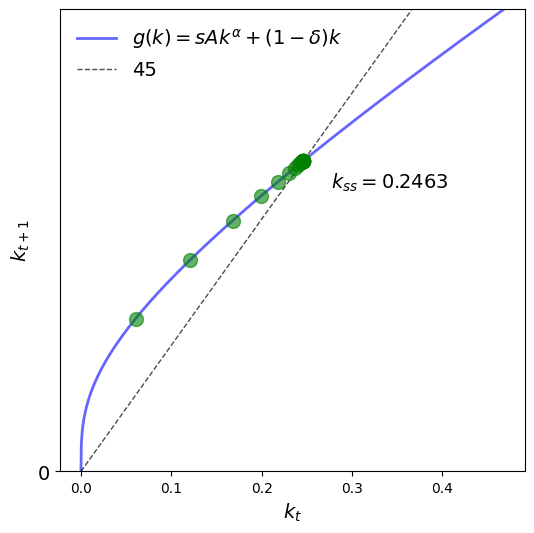

In [71]:
params  = create_solow_params()
fig, ax = plt.subplots(figsize=(6, 6))
plot_45(sss, params, k_series, ax)

Thus, we have already defined the following functions:


*   SS capital stock, **s_capital**.
*   SS savings rate, **s_capital**.
*   Conevergence of capital stock, **compute_iterates**.
*   Graph of the capital stock dynamics, **plot_45**



Given all this functions, it is possible to create a new function that solves the model for any set of parameters. For example, imagine the case in which

1.   The TFP increase to $A=50$.
2.   The elasticity of the production with respect to capital stock decrease to $\alpha=0.05$.
3.   The economy stops being impatient such that $\beta=1$.
4.   The depreciation rate increase to $\delta=0.8$



In [44]:
def solve_solow(p_model):
  # STEP 1: Get the SS savings rate.
  s_ss     = s_savings(p_model)

  # STEP 2: Get the SS capital stock.
  k_ss     = s_capital(s_ss, p_model)

  # STEP 3: Get the first 30 values ​​that the capital stock takes before reaching the SS.
  k_series = compute_iterates(0.01, s_ss, g, p_model)

  # STEP 4: Get the graph of capital stock dynamics
  fig, ax  = plt.subplots(figsize=(6, 6))

  return plot_45(s_ss, p_model, k_series, ax)


<ipython-input-41-c3d4a1fdda57>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(kiter[:-1], kiter[1:], "ro", ms=10, alpha=0.6, color = 'green')           # Order to graph the first 30 iterations
<ipython-input-41-c3d4a1fdda57>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  ax.plot(fps, fps, "go", ms=10, alpha=0, color = 'green')       # Graph a red point where k* is located


<function matplotlib.pyplot.show(close=None, block=None)>

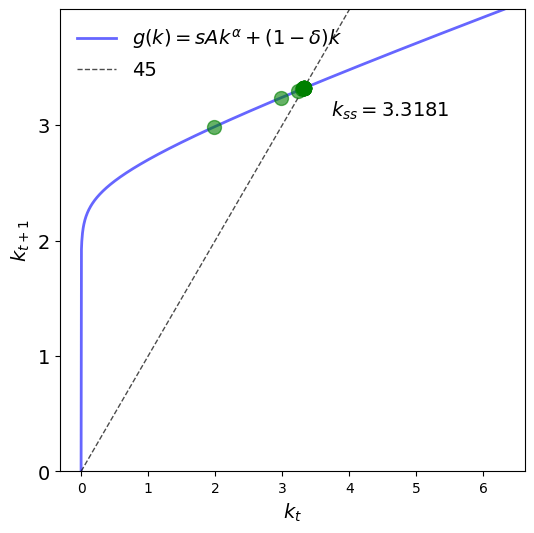

In [61]:
p_model = create_solow_params(A = 50, alpha = 0.05, beta = 1, delta = 0.8)
solve_solow(p_model)

Graphically it is possible to see that **there is a single fixed point**, however, it is necessary to prove it formally.

There's a lot of posible proofs of why the fixed point exists and is unique, but the simplest way to do it is by means of the slopes of the functions involved.

First of all, the slope of the identity function is equal to $1$.

On the other hand, since $\forall x_{1},x_{2}$ such that $x_{1}<x_{2}$ we have that

$$x_{1}<x_{2}$$

$$x_{1}^{\alpha}<x_{2}^{\alpha}$$

$$s_{ss}Ax_{1}^{\alpha}<s_{ss}Ax_{2}^{\alpha}$$

$$s_{ss}Ax_{1}^{\alpha}+(1-δ)x_{1}<s_{ss}Ax_{2}^{\alpha}+(1-δ)x_{2}$$

which means that $g(x_{1})<g(x_{2})$. Thus, the law of motion of capital stock is **monotone**.

We also know that

$$g'(k)=\frac{αs_{ss}A}{k^{1-α}}+(1-\delta)$$

such that

$$\lim_{k→0}g'(k)=∞$$     $$\lim_{k→∞}g'(k)=1-\delta$$.

which means that the law of motion of capital $g$ satisfies **Inada conditions**.

Given that the law of motion of capital stock is monotone and that it's slope tend to be equal to $1-\delta<1$, then it is evident that there is a unique point in which the law of motion of capital intersects with the identity function.

Therefore, the **solution exists and it is unique**.


## **Appendix**

$^{1}$In order to obtain the SS capital stock we just have to clear the law of motion of capital wrt to $k_{ss}$.

$$k_{ss}=s_{ss}Ak_{ss}^α+(1-δ)k_{ss}$$

$$\delta k_{ss}=s_{ss}Ak_{ss}^α$$

$$k_{ss}^{1-\alpha}=\frac{s_{ss}A}{\delta}$$

$$k_{ss}=\left(\frac{s_{ss}A}{\delta}\right)^{\frac{1}{1-\alpha}}$$

